In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import scipy 
import scipy.optimize as so


from scipy import odr
from uncertainties import unumpy, ufloat

In [2]:
dataframe_exercise= pd.read_csv("ex9_data.csv") 

In [3]:
dataframe_exercise

,x
0,1.162271
1,1.142611
2,1.487702
3,1.214966
4,0.378743
...,...
599,0.249427
600,1.052465
601,1.383870
602,0.792205


In [4]:
x=dataframe_exercise["x"].to_numpy(dtype="float64")
x

array([1.1622708 , 1.14261148, 1.48770249, 1.21496573, 0.37874302,
       0.62203172, 1.0953066 , 1.79740888, 1.75981583, 1.86911372,
       1.01101851, 0.01522954, 0.22897083, 0.98015134, 0.94751544,
       0.9171621 , 0.9536214 , 0.78055541, 0.99238395, 0.93266941,
       0.87158149, 0.22673927, 1.51594492, 0.68183842, 0.4634497 ,
       1.91125515, 0.85968954, 1.17322892, 0.90448532, 1.08096202,
       0.83139516, 1.4324792 , 0.42711986, 1.466674  , 1.10117519,
       1.09153629, 1.65308797, 1.27073958, 1.77698119, 1.42790263,
       0.40242512, 1.11821113, 0.96492786, 1.3668637 , 0.12219591,
       1.19114803, 0.77530112, 0.85800701, 1.23900982, 1.47837635,
       0.12114132, 1.64125673, 0.53211714, 1.15044652, 0.95048631,
       1.95461092, 1.61853954, 1.57732227, 1.80917583, 0.89420001,
       0.45600729, 0.21842884, 1.13526166, 1.92828619, 0.93642246,
       1.92626855, 1.39621025, 1.37198935, 1.11521587, 1.48525265,
       1.61232844, 1.20551894, 1.48201961, 1.18951576, 1.34264

In [5]:
np.sqrt(len(x))

24.576411454889016

First of all I plot the data as a histogram

Text(0, 0.5, 'Frequency')

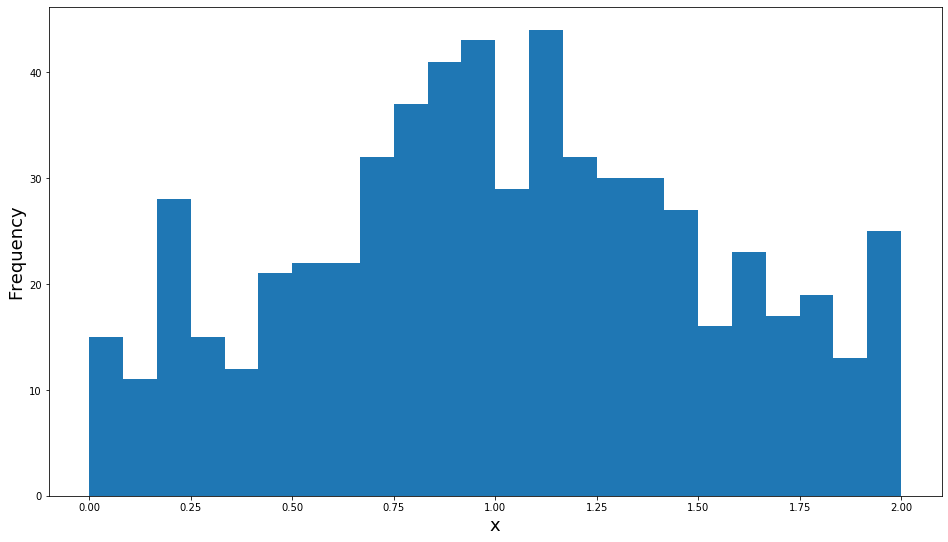

In [6]:
bins=np.linspace(0,2, num=25)

fig = plt.figure(figsize=(16, 9), dpi=72)
plt.hist(x, bins=bins)
plt.xlabel("x",fontsize=18)
plt.ylabel("Frequency", fontsize=18)

2.Now I want to perform an extended maximum likelihood fit. <br>

The extended maximum likelihood is defined by 

$$L=\frac{\nu^n}{n!}\cdot e^{-\nu}\cdot \prod_{i=1}^{n} f(x_i,\theta)$$

$$ln(L)=-\nu+\sum_{i=1}^{n} ln(\nu f(x_i,\theta))+C$$

In our case we have $$f(x)=\frac{\nu_s}{\nu_s+\nu_B}\cdot f_s(x)+\frac{\nu_B}{\nu_s+\nu_B}\cdot f_B(x)$$

The Poissonian distribution in this case is characterized by $$\nu=\nu_s+\nu_B$$

Putting these thingsa together into our log-Likelihood then leads to:
    
$$ln(L)=-\nu_s-\nu_B+\sum_{i=1}^{n} ln(\nu_s\cdot f_s(x)+\nu_B\cdot f_B(x))+C$$

Furthermore we have $$f_s(x)=\frac{1}{2}$$ and $$\frac{4}{erf(2\sqrt{2})\cdot \sqrt{2\pi}}\cdot exp\Big[-\frac{1}{2}\cdot \Big(\frac{x-1}{1/4}\Big)^2\Big]$$

Now I can write my log-Likelihood function

In [7]:
import scipy.special

In [8]:
def log_likelihood(nu_s,nu_B,x):
    #nu_s, nu_B = params
    return -nu_s-nu_B+np.sum(np.log(1/2*nu_B+nu_s*4/(np.sqrt(2*np.pi)*scipy.special.erf(2*np.sqrt(2)))*np.exp(-1/2*((x-1)/(1/4))**2)))

3. Now I consider $\nu_B=420.7$ and I want to obtain $\nu_s$ by Maximum Likelihood estimation. A Maximization of the Likelihood corresponds to a Minimization of the negative log Likelihood. Therefore I define a new function

In [9]:
def neg_log_likelihood(params,x):
    nu_s,nu_B = params
    return -log_likelihood(nu_s,420.7,x)

In [10]:
Optimal= so.minimize(neg_log_likelihood,x0=[1,420.7],args=(x))["x"]

In [11]:
Optimal

array([179.30432563, 420.7       ])

In [12]:
nu_s_max=Optimal[0]
nu_s_max

179.30432563125487

4. Now I want to plot log(L) as a function of different values of $\nu_s$ around the just obtained $\nu_{s_{max}}$

In [14]:
nu_s_array=np.linspace(0,2*nu_s_max,10000)
nu_s_array

array([0.00000000e+00, 3.58644516e-02, 7.17289031e-02, ...,
       3.58536922e+02, 3.58572787e+02, 3.58608651e+02])

In [15]:
log_L_array=np.zeros(0)

for i in range(len(nu_s_array)):
    log_L=log_likelihood(nu_s_array[i],420.7,x)
    
    log_L_array=np.append([log_L_array],[log_L])   #Calculate the log_L values for the different nu_s
    
log_L_array

array([2809.95877726, 2809.99280934, 2810.02682714, ..., 2843.30169083,
       2843.29058378, 2843.27947523])

(2200, 2900)

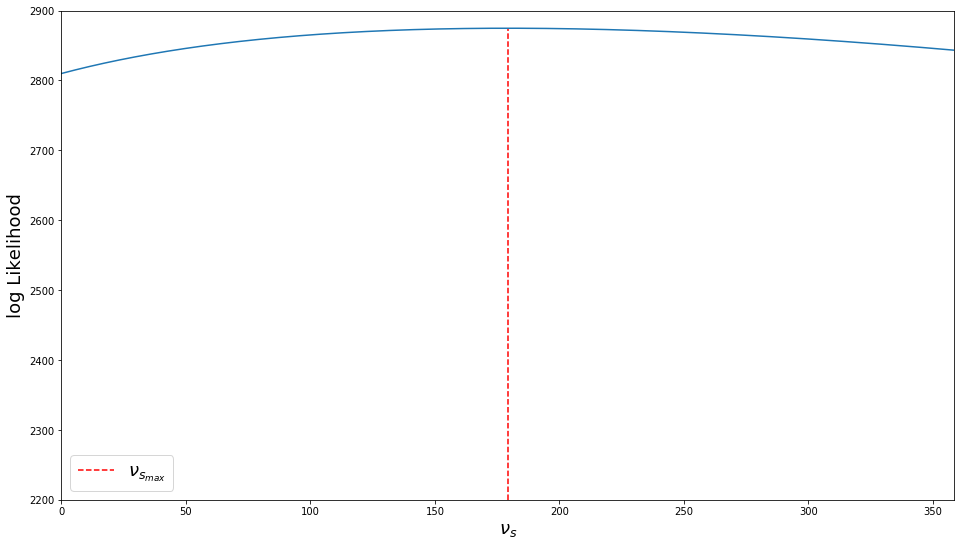

In [16]:
fig = plt.figure(figsize=(16, 9), dpi=72)
plt.vlines(nu_s_max,2200,np.max(log_L_array),"r","--",alpha=1,label=r"$\nu_{s_{max}}$")
plt.plot(nu_s_array,log_L_array)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.ylabel("log Likelihood",fontsize=18)
plt.legend(fontsize=18)
plt.xlim(0,2*nu_s_max)
plt.ylim(2200,2900)

Now I want to plot $exp(ln(L(\nu_s))-ln(L_{max}))$

Text(0, 0.5, '$exp(ln(L(\\nu_s))-ln(L_{max}))$')

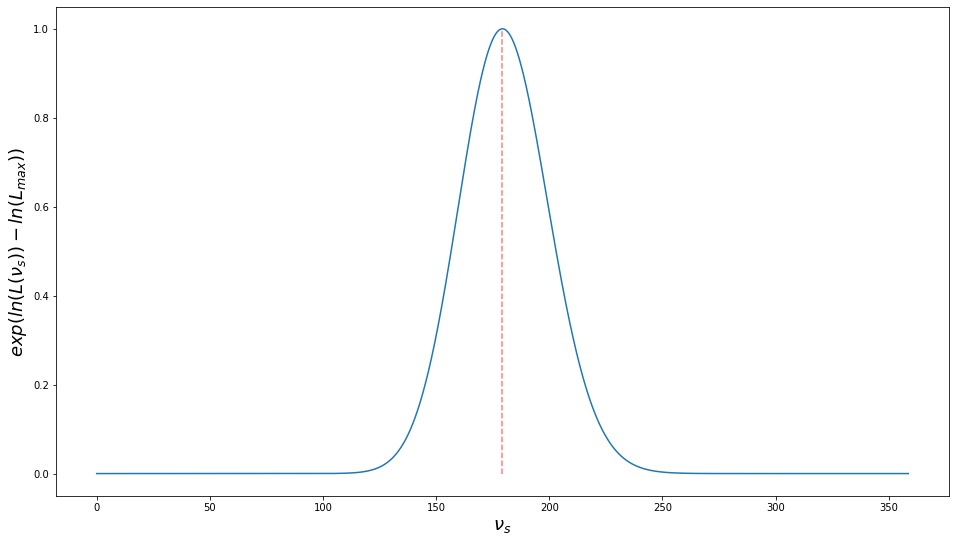

In [17]:
fig = plt.figure(figsize=(16, 9), dpi=72)
plt.vlines(nu_s_max,0,1,"r","--",alpha=0.5,label=r"$\nu_{s_{max}}$")
plt.plot(nu_s_array,np.exp(log_L_array-log_likelihood(nu_s_max,420.7,x)))
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.ylabel(r"$exp(ln(L(\nu_s))-ln(L_{max}))$",fontsize=18)

5. First of all I generate random values of $\nu_s$ uniformly distributed around $\nu_{s_{max}}$

In [18]:
rand_array=np.random.uniform(0,2*nu_s_max,10000)

Now I want to plot thesNow I want to plot these values weighted by $exp(ln(L(\nu_s))-ln(L_{max}))$

First of all I just plot the random data

Text(0, 0.5, 'Frequency')

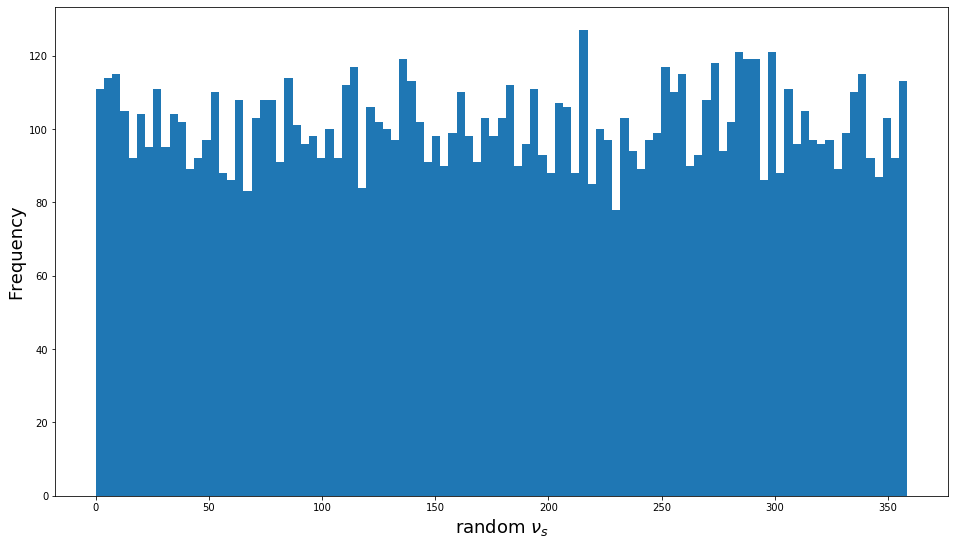

In [19]:
bins=np.linspace(0,2*nu_s_max, num=100)

fig = plt.figure(figsize=(16, 9), dpi=72)
number=plt.hist(rand_array,bins=bins)[0]   #Frequency array

plt.xlabel(r"random $\nu_s$",fontsize=18)
plt.ylabel("Frequency", fontsize=18)

In [20]:
number

array([111., 114., 115., 105.,  92., 104.,  95., 111.,  95., 104., 102.,
        89.,  92.,  97., 110.,  88.,  86., 108.,  83., 103., 108., 108.,
        91., 114., 101.,  96.,  98.,  92., 100.,  92., 112., 117.,  84.,
       106., 102., 100.,  97., 119., 113., 102.,  91.,  98.,  90.,  99.,
       110.,  98.,  91., 103.,  98., 103., 112.,  90.,  96., 111.,  93.,
        88., 107., 106.,  88., 127.,  85., 100.,  97.,  78., 103.,  94.,
        89.,  97.,  99., 117., 110., 115.,  90.,  93., 108., 118.,  94.,
       102., 121., 119., 119.,  86., 121.,  88., 111.,  96., 105.,  97.,
        96.,  97.,  89.,  99., 110., 115.,  92.,  87., 103.,  92., 113.])

I define the center points of my bins

In [21]:
nu_hist=np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    nu_hist[i]=np.abs(bins[i]+bins[i+1])/2
    

nu_hist

array([  1.8111548 ,   5.43346441,   9.05577402,  12.67808363,
        16.30039324,  19.92270285,  23.54501246,  27.16732207,
        30.78963167,  34.41194128,  38.03425089,  41.6565605 ,
        45.27887011,  48.90117972,  52.52348933,  56.14579894,
        59.76810854,  63.39041815,  67.01272776,  70.63503737,
        74.25734698,  77.87965659,  81.5019662 ,  85.1242758 ,
        88.74658541,  92.36889502,  95.99120463,  99.61351424,
       103.23582385, 106.85813346, 110.48044307, 114.10275267,
       117.72506228, 121.34737189, 124.9696815 , 128.59199111,
       132.21430072, 135.83661033, 139.45891994, 143.08122954,
       146.70353915, 150.32584876, 153.94815837, 157.57046798,
       161.19277759, 164.8150872 , 168.43739681, 172.05970641,
       175.68201602, 179.30432563, 182.92663524, 186.54894485,
       190.17125446, 193.79356407, 197.41587367, 201.03818328,
       204.66049289, 208.2828025 , 211.90511211, 215.52742172,
       219.14973133, 222.77204094, 226.39435054, 230.01

Now I calculate the log_Likelihood for the nu_hist values

In [22]:
log_L_hist_array=np.zeros(0)

for i in range(len(nu_hist)):
    log_L_hist=log_likelihood(nu_hist[i],420.7,x)
    
    log_L_hist_array=np.append([log_L_hist_array],[log_L_hist])
    
log_L_hist_array

array([2811.65967868, 2814.9554245 , 2818.11490484, 2821.14393071,
       2824.04793306, 2826.83199604, 2829.5008866 , 2832.05908099,
       2834.51078847, 2836.85997262, 2839.11037057, 2841.26551032,
       2843.32872639, 2845.30317411, 2847.19184246, 2848.99756587,
       2850.72303491, 2852.37080611, 2853.94331091, 2855.44286388,
       2856.87167023, 2858.23183279, 2859.52535836, 2860.7541636 ,
       2861.9200805 , 2863.02486136, 2864.07018348, 2865.05765344,
       2865.98881116, 2866.86513355, 2867.68803803, 2868.45888572,
       2869.17898446, 2869.84959161, 2870.47191665, 2871.04712369,
       2871.57633367, 2872.06062661, 2872.50104354, 2872.89858843,
       2873.25422997, 2873.56890321, 2873.84351117, 2874.07892627,
       2874.27599177, 2874.43552306, 2874.55830887, 2874.64511252,
       2874.69667294, 2874.71370577, 2874.69690433, 2874.64694055,
       2874.56446587, 2874.4501121 , 2874.30449216, 2874.1282009 ,
       2873.92181577, 2873.68589755, 2873.42099096, 2873.12762

I just plot the values I found this way

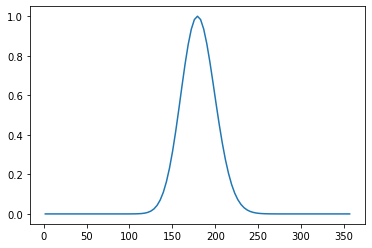

In [23]:
plt.plot(nu_hist,np.exp(log_L_hist_array-log_likelihood(nu_s_max,420.7,x)))

Now I want to weight the histogram of the random values

In [24]:
height=number*np.exp(log_L_hist_array-log_likelihood(nu_s_max,420.7,x))

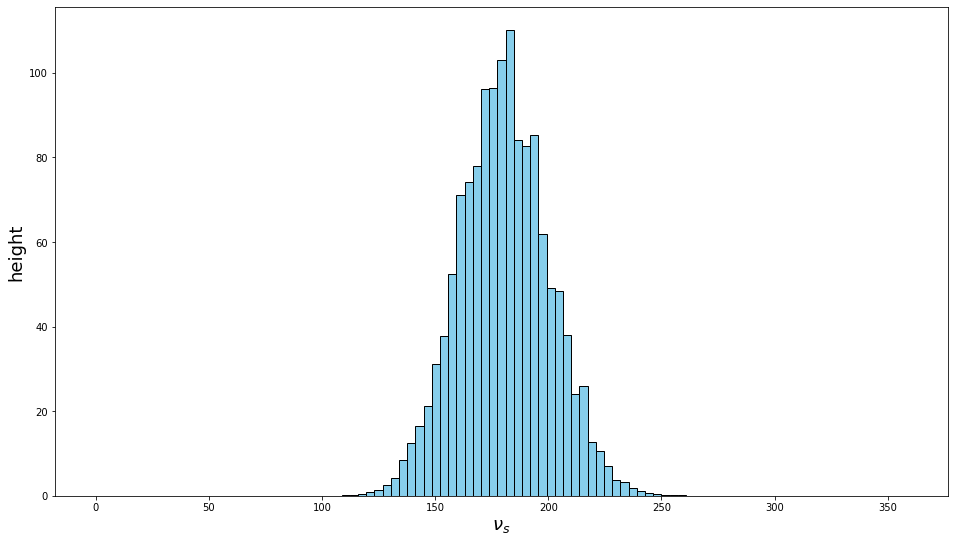

In [25]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height, width=np.diff(bins), align='edge', fc='skyblue', ec='black')
plt.ylabel("height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.show()

Now I want to normalize this distribtuion

In [26]:
Norm=np.sum(height)*np.diff(bins)

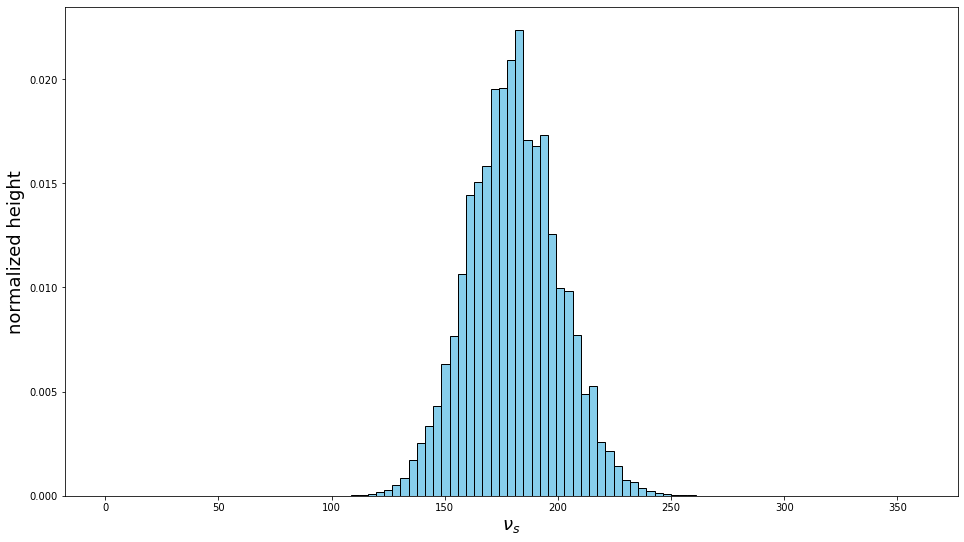

In [27]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.show()

In that case we have for the integral

In [28]:
np.sum(height/(Norm)*np.diff(bins))

1.0000000000000002

So it is normalized to 1

It looks like a gaussian distribution.

6. Now I want to represent this distribution with a gaussian kernel estimator

The way I did it here is to take the height and make an array with the same length and then put it at the corresponding nu_s position. A problem is that the height values are not whole numbers so therefore the kernel estimator will only be an approximation

In [29]:
ges_bin=np.zeros(0)

for i in range(len(height)):
    k=int(np.round(height[i]))
    sub_bin=np.ones(k)*nu_hist[i]    #Take the height and make an array with the same length and then put it at the corresponding nu_s position
    
    ges_bin=np.concatenate((ges_bin, sub_bin), axis=None)
    
ges_bin

array([121.34737189, 124.9696815 , 128.59199111, ..., 237.26127937,
       240.88358898, 244.50589859])

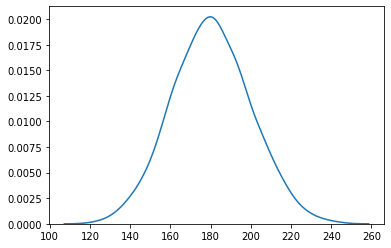

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.neighbors import KernelDensity

sns.kdeplot(ges_bin)

Now I plot the kernel estimator with the distribution.

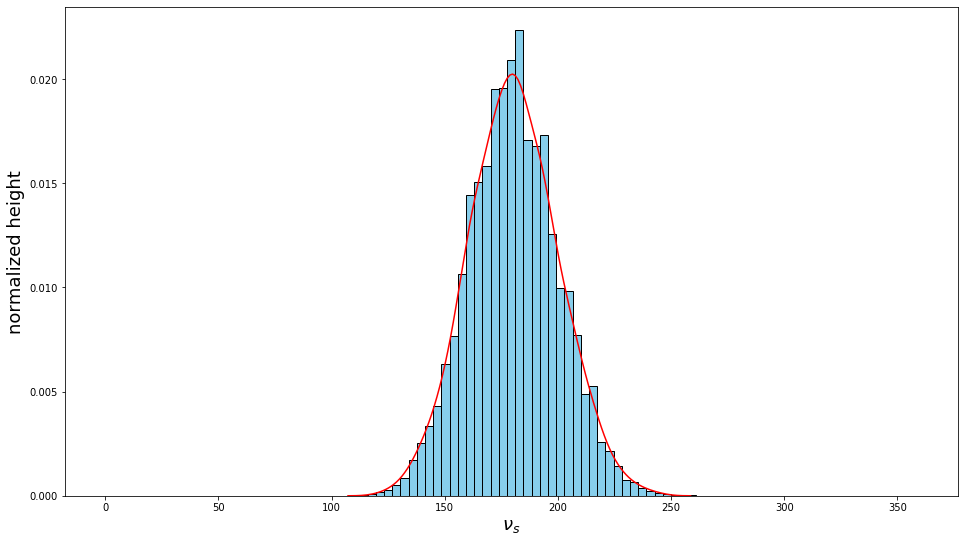

In [31]:
bins=np.linspace(0,2*nu_s_max, num=100)

fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')
sns.kdeplot(ges_bin, color="r")

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)

plt.show()

7.Now we want to repeat the same thing but instead of using a uniform distribution around $\nu_s$ we will use a gaussian distribution with mean 350 and width 50

In [53]:
rand_array=np.random.normal(350,50,10000)

Again I plot this random data

Text(0, 0.5, 'Frequency')

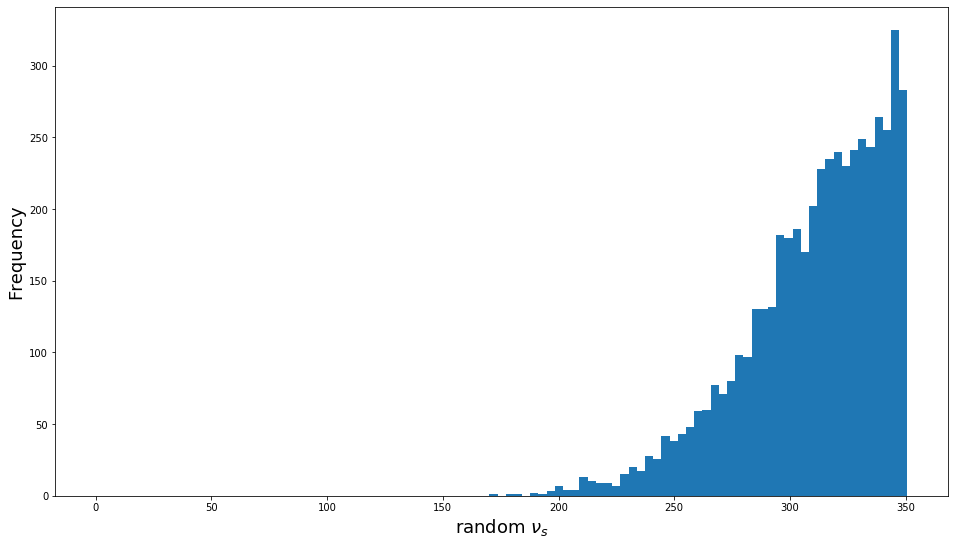

In [54]:
bins=np.linspace(0,2*nu_s_max, num=100)

fig = plt.figure(figsize=(16, 9), dpi=72)
number=plt.hist(rand_array,bins=bins)[0]   #Frequency array

plt.xlabel(r"random $\nu_s$",fontsize=18)
plt.ylabel("Frequency", fontsize=18)

Now I basically repeat the things I did before


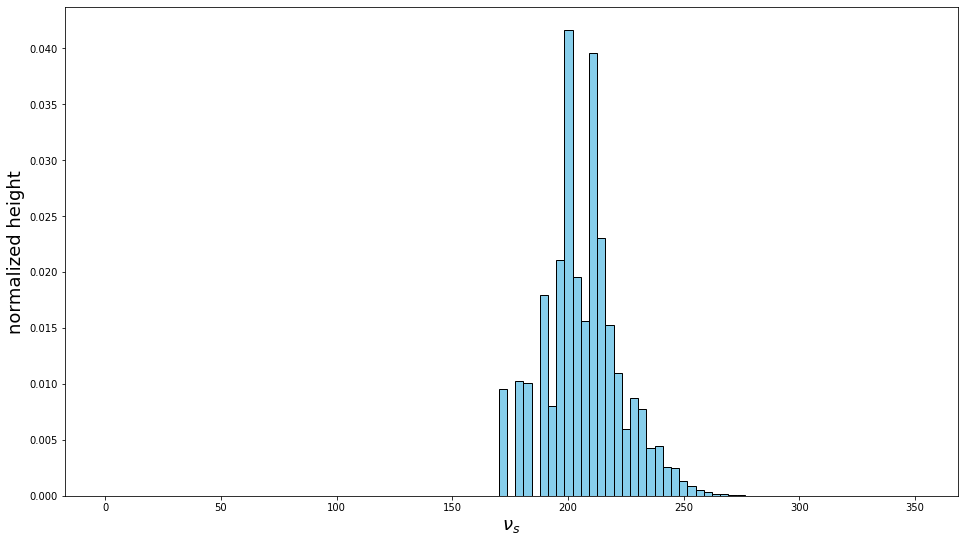

In [55]:
nu_hist=np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    nu_hist[i]=np.abs(bins[i]+bins[i+1])/2
    

#nu_hist

log_L_hist_array=np.zeros(0)

for i in range(len(nu_hist)):
    log_L_hist=log_likelihood(nu_hist[i],420.7,x)
    
    log_L_hist_array=np.append([log_L_hist_array],[log_L_hist])
    
#log_L_hist_array

height=number*np.exp(log_L_hist_array-log_likelihood(nu_s_max,420.7,x))


Norm=np.sum(height)*np.diff(bins)


fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)
plt.show()

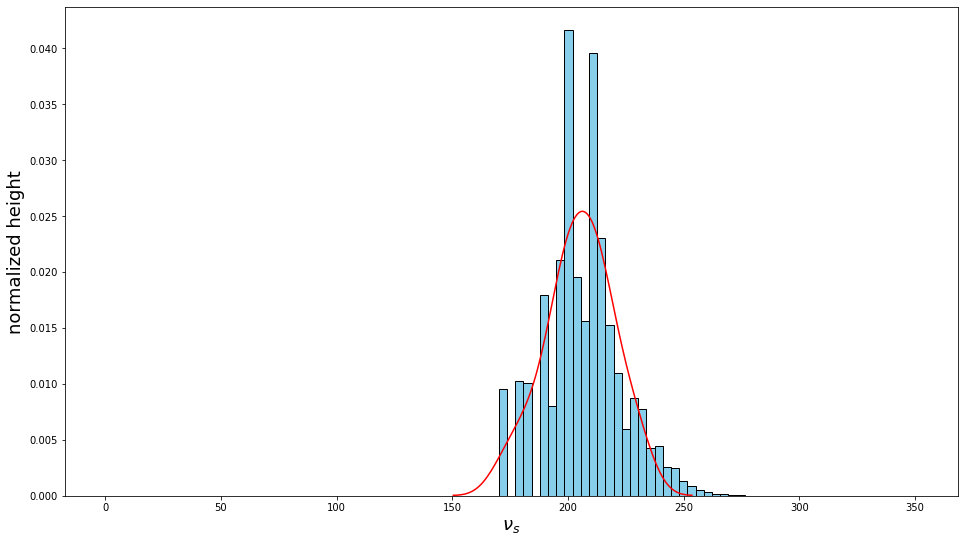

In [56]:
ges_bin=np.zeros(0)

for i in range(len(height)):
    k=int(np.round(height[i]))
    sub_bin=np.ones(k)*nu_hist[i]    #Take the height and make an array with the same length and then put it at the corresponding nu_s position
    
    ges_bin=np.concatenate((ges_bin, sub_bin), axis=None)
    
#ges_bin

bins=np.linspace(0,2*nu_s_max, num=100)

fig, ax = plt.subplots(figsize=(16, 9), dpi=72)



ax.bar(x=bins[:-1], height=height/(Norm), width=np.diff(bins), align='edge', fc='skyblue', ec='black')
sns.kdeplot(ges_bin, color="r")

plt.ylabel("normalized height",fontsize=18)
plt.xlabel(r"$\nu_s$",fontsize=18)

plt.show()

The distribution now looks rather different.

8. Now I want to look at the 2D case. Therefore I redefine my Likelihood function

In [57]:
def log_likelihood(nu_s,nu_B,x):
    #nu_s, nu_B = params
    return -nu_s-nu_B+np.sum(np.log(1/2*nu_B+nu_s*4/(np.sqrt(2*np.pi)*scipy.special.erf(2*np.sqrt(2)))*np.exp(-1/2*((x-1)/(1/4))**2)))
    

In [58]:
def neg_log_likelihood(params,x):
    nu_s,nu_B = params
    return -log_likelihood(nu_s,nu_B,x)

In [59]:
Optimal= so.minimize(neg_log_likelihood,x0=[1,420.7],args=(x))["x"]
Optimal

array([175.40337056, 428.59349645])

In [60]:
nu_s_max=Optimal[0]
nu_s_max

175.40337056142045

In [61]:
nu_B_max=Optimal[1]
nu_B_max

428.5934964482858